**STAGE B QUIZ SOLUTIONS by Emek Udoh**


**THE NON-CODING PART OF THE QUIZ**

Question 1:The percent of the total variation of the dependent variable Y explained by the set of independent variables X is measured by

Answer: Coefficient of Determination

Question 2: How do you define a Residual?

Ans:

Question 3:The straight line graph of the equation Y = a + BX, the slope is horizontal if
    
    
Answer: b=0
    

Question 4: Which of the one is true about Heteroskedasticity?
    
Answer:Linear Regression with varying error terms

Question 5: Generally, which of the following method(s) is used for predicting continuous dependent variables?
    
Answer:1 and 2

Question 6: From the following options below, which of these is/are true about “Ridge” or “Lasso” regression methods in case of feature selection?
    
Answer:Both use subset selection of features

Question 7:Which of the following sentences is/are true about outliers in Linear Regression
    
Answer:Linear regression is sensitive to outliers

Question 8: Which of the following metrics can be used for evaluating regression models?
    
Answer:1, 2, 3 and 4

Question 9:A best fit line relating X and Y has a R-Squared value of 0.75. How do I interpret this information?
    
Answer:75% of the variance in Y is explained by X

Question 10:Which of the following measures is optimal for comparing the goodness of the fit of competing regression models involving the same dependent variable?
    
Answer:R-square

Question 11: The Lasso can be interpreted as least-squares linear regression where:
    
Answer:Weights are regularized with the L1 norm

In [1]:
#importing the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
quiz_data = pd.read_csv('energydata_complete.csv')

In [3]:
# viewing the first five rows of the imported dataset
quiz_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
# viewing the last five rows of the dataset
quiz_data.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [5]:
# viewing the shape of the dataset
quiz_data.shape


(19735, 29)

The imported data has 19735 rows and 29 columns (features)

In [6]:
# viewing the summary of the information about the imported data

quiz_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

The dataset consists of different data types in terms of the columns (26 floats, 2 integers and 1 object).

From the Non-Null count, it is obvious that the dataset has no null values.

In [8]:
#checking for null values

quiz_data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [35]:
# fit a model between T2 and T6
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

In [9]:
#assigning the feature variables
X = quiz_data[['T2']] # i.e temperature in living room area in celsius
y = quiz_data[['T6']] # i .e temperature outside the building

**QUESTION 12**

**Linear Regression between 'T2' and 'T6'** 

<AxesSubplot:xlabel='T2', ylabel='T6'>

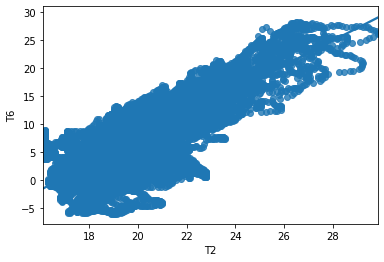

In [10]:
sns.regplot(data=quiz_data,x='T2',y='T6')

In [11]:
#splitting the variable into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1111)

In [12]:
linear = linear.fit(X_train,y_train)
pred = linear.predict(X_test)

from sklearn.metrics import r2_score
r2_score = r2_score(y_test,pred)
round(r2_score,2)

0.64

**QUESTION 13**

In [13]:
# to remove date and light then normalize the dataset...Note: applicances is the target variable
quiz_data.drop(['date','lights'],axis=1,inplace=True)


In [14]:
#viewing the first five rows of the data set after removing date and light
quiz_data.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [15]:
#Using the MinMaxScaler to normalize the dataset

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normalized_quiz_data = pd.DataFrame(scaler.fit_transform(quiz_data),columns=quiz_data.columns)
normalized_quiz_data.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [16]:
features = normalized_quiz_data.drop('Appliances',axis=1)
target = normalized_quiz_data['Appliances']

**70:30 train test split and random state=42**

In [17]:
#70:30 train_test_split
feat_train, feat_test, targ_train, targ_test = train_test_split(features,target,test_size=0.3, random_state=42)

**Multiple Linear Regression, Model fit and Making Predictions**

In [18]:
#model
linear_model = LinearRegression()

#fitting model
linear_model.fit(feat_train,targ_train)

#making predictions
predicted_values = linear_model.predict(feat_test)

**Importing Evaluation metrics**

In [19]:

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

**Mean Absolute Error (MAE) to 2 decimal places**

In [20]:
mae = mean_absolute_error(targ_test, predicted_values)
round(mae, 2)

0.05

**QUESTION 14**

**Residual sum of squares in 2 decimal places**

In [33]:
#Finding the residual sum of squares in 2 decimal places
RSS = round(np.sum(np.square(targ_test-predicted_values)),2)

In [34]:
RSS

45.35

**QUESTION 15**

**Root mean squared error in 3 decimal places**

In [22]:
# What is the root mean squared error in 3 decimal places
rmse_1 = mean_squared_error(targ_test,predicted_values,squared=False)
round(rmse_1,3)

0.088

**QUESTION 16**

**The coefficient of determination in 2 decimal places(r-squared)**

In [23]:
coef_of_det = r2_score(targ_test,predicted_values)
round(coef_of_det,2)

0.15

**QUESTION 17**


**Obtaining weights**

In [24]:
#Obtain the feature weights, which has the highest and the lowest
weights = pd.Series(linear_model.coef_,features.columns)
weights.sort_values()

RH_2          -0.456698
T_out         -0.321860
T2            -0.236178
T9            -0.189941
RH_8          -0.157595
RH_out        -0.077671
RH_7          -0.044614
RH_9          -0.039800
T5            -0.015657
T1            -0.003281
rv1            0.000770
rv2            0.000770
Press_mm_hg    0.006839
T7             0.010319
Visibility     0.012307
RH_5           0.016006
RH_4           0.026386
T4             0.028981
Windspeed      0.029183
RH_6           0.038049
RH_3           0.096048
T8             0.101995
Tdewpoint      0.117758
T6             0.236425
T3             0.290627
RH_1           0.553547
dtype: float64

In [25]:
#sorting weights to obtain the lowest value
weights.sort_values().min()

-0.45669794833849997

In [26]:
#sorting weights to obtain the highest value
weights.sort_values().max()

0.5535465998386386

*From the results shown above **RH_2** and **RH_1** have the lowest and highest values respectively.*

**QUESTION 18**

**Checking for possible change in RMSE using Ridge Regression @ alpha = 0.4**

In [27]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.4)

#fit
ridge.fit(feat_train,targ_train)

#predictions
ridge_pred = ridge.predict(feat_test)

#check RMSE
rmse = mean_squared_error(targ_test,ridge_pred,squared=False)
round(rmse,3)

0.088

*there is no significant change in **RMSE**.*

**QUESTION 19**

**Train lasso with alpha = 0.001**

In [28]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.001)

#train the model
lasso_reg.fit(feat_train,targ_train)


#feature_weights
lasso_weights = pd.Series(lasso_reg.coef_, features.columns)
lasso_weights

T1             0.000000
RH_1           0.017880
T2             0.000000
RH_2          -0.000000
T3             0.000000
RH_3           0.000000
T4            -0.000000
RH_4           0.000000
T5            -0.000000
RH_5           0.000000
T6             0.000000
RH_6          -0.000000
T7            -0.000000
RH_7          -0.000000
T8             0.000000
RH_8          -0.000110
T9            -0.000000
RH_9          -0.000000
T_out          0.000000
Press_mm_hg   -0.000000
RH_out        -0.049557
Windspeed      0.002912
Visibility     0.000000
Tdewpoint      0.000000
rv1           -0.000000
rv2           -0.000000
dtype: float64

In [29]:
#How many of the features have non-zero feature weights
sum(lasso_weights != 0)

4

**QUESTION 20**

In [30]:
#Lasso predictions
lasso_pred = lasso_reg.predict(feat_test)

In [31]:
#new RMSE
lasso_rmse = mean_squared_error(targ_test,lasso_pred,squared=False)
round(lasso_rmse,3)

0.094